In [1]:
import requests
import certifi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data ref. https://covid-19.geohive.ie/datasets/d8eb52d56273413b84b0187a4e9117be_0/data

In [2]:
csvio = requests.get('https://opendata.arcgis.com/datasets/d8eb52d56273413b84b0187a4e9117be_0.csv', stream=True).raw
csvio.decode_content = True
df = pd.read_csv(csvio)

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df['deaths_ma'] = df['ConfirmedCovidDeaths'].rolling(7, min_periods=1).mean()
#df['deaths_ema'] = df['ConfirmedCovidDeaths'].ewm(halflife=2).mean().rolling(7, min_periods=1).mean()

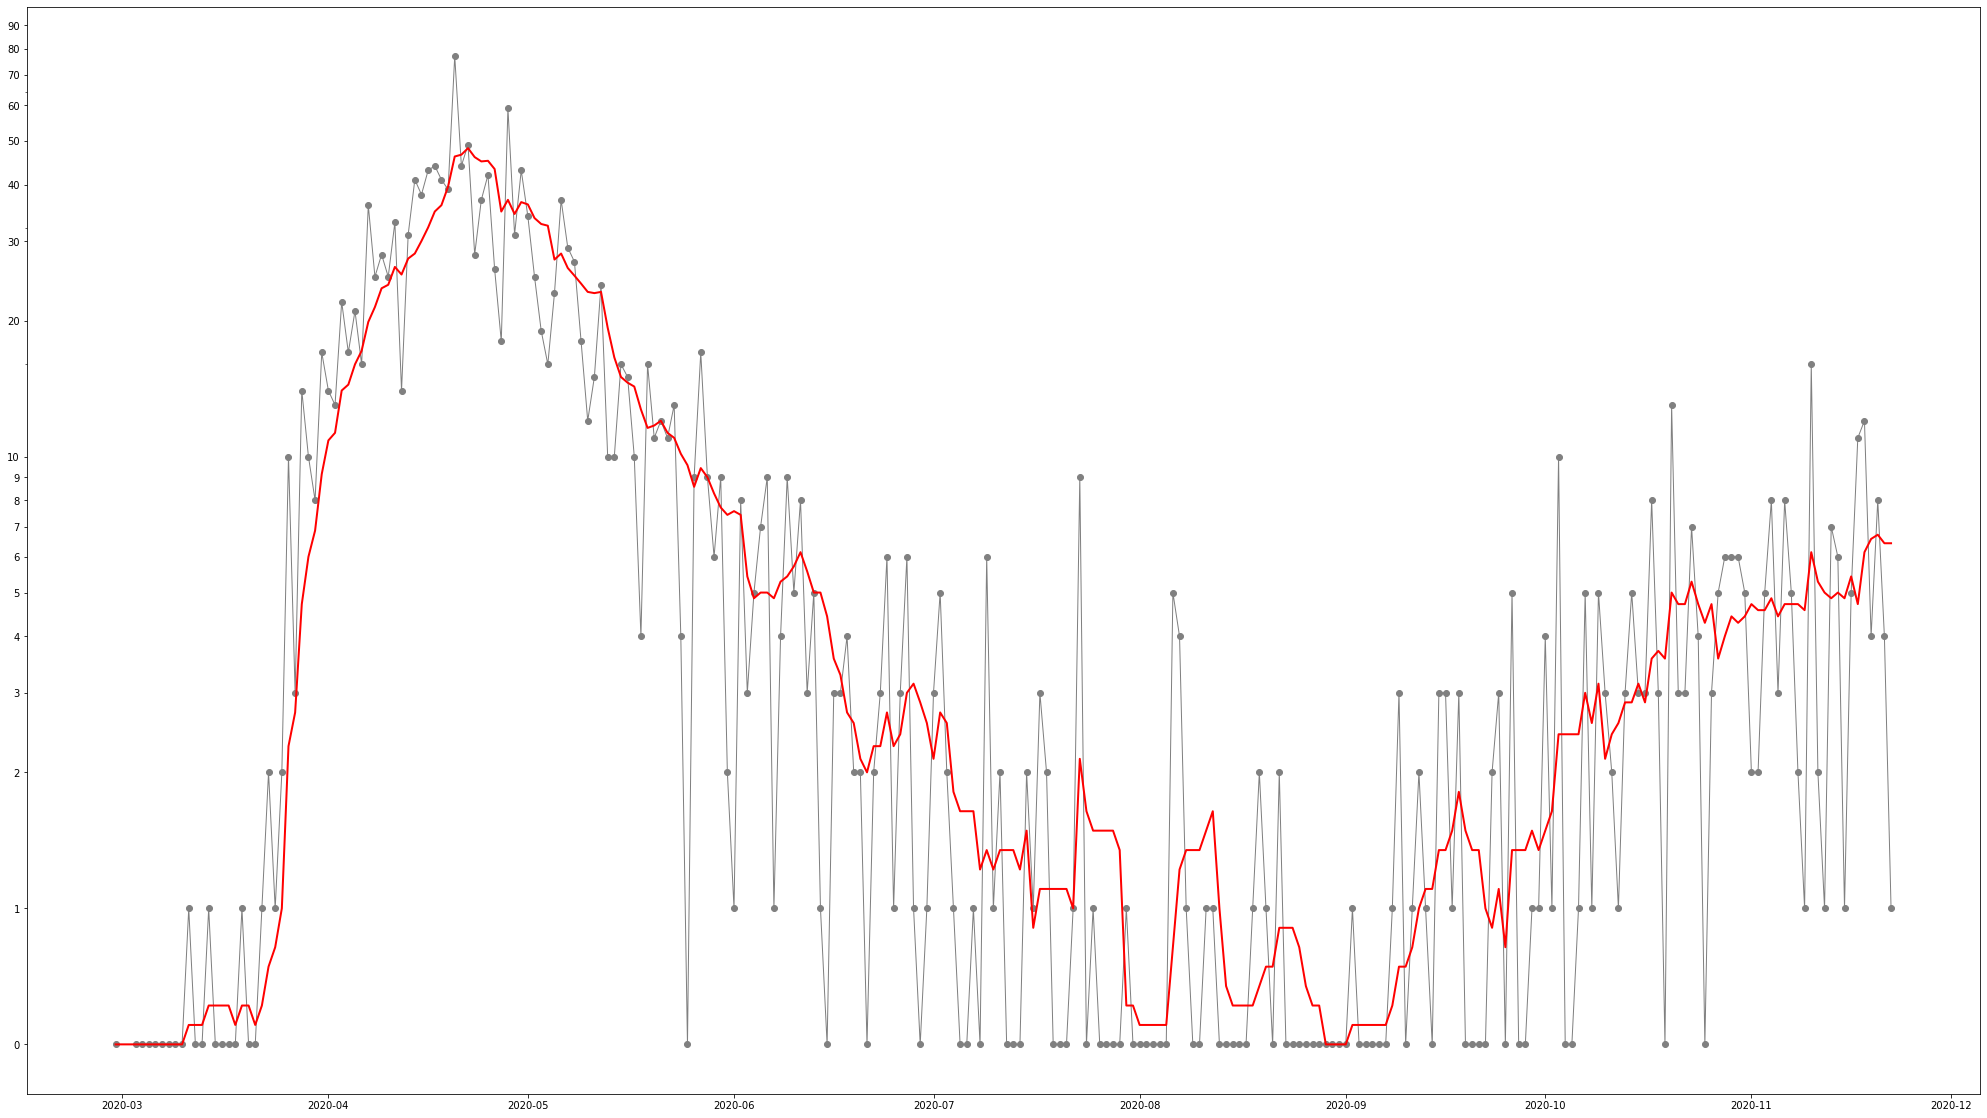

In [5]:
plt.figure(figsize=[35,20])
plt.yscale('symlog', linthresh=2, base=2)
plt.yticks(ticks=(0,1,2,3,4,5,6,7,8,9,10, 20, 30, 40, 50, 60, 70, 80, 90, 100), labels=(0,1,2,3,4,5,6,7,8,9,10, 20, 30, 40, 50, 60, 70, 80, 90, 100))

plt.plot(df['Date'], df['ConfirmedCovidDeaths'],'-o', color="grey", linewidth=1)
plt.plot(df['Date'], df['deaths_ma'], 'r', linewidth=2)
